In [7]:
#  Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
 # creating the dataframe
df = pd.read_csv('loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# displaying the shape of the DataFrame
df.shape

(614, 13)

In [10]:
#print the full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
# remove 'Loan_ID' column from the DataFrame
clean_df = df.drop(columns=["Loan_ID"])
# drop rows with any missing values
clean_df = clean_df.dropna()
# print the cleaned DataFrame
print(clean_df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [18]:
# display
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Summary data

   Count  Percentage
Y    332    0.691667
N    148    0.308333


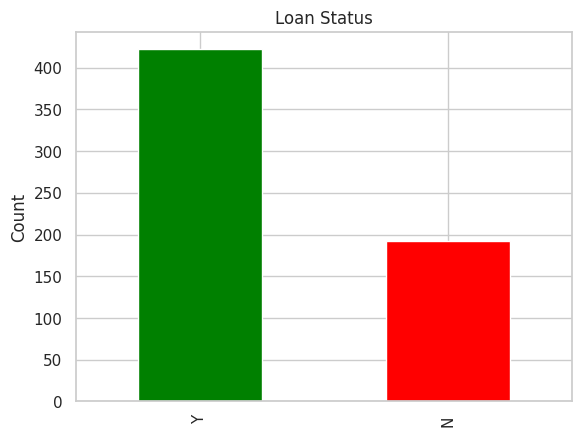

In [28]:
value_counts = clean_df['Loan_Status'].value_counts()
# calculate the percentage of each category in the 'Loan_Status' column
percentage = clean_df['Loan_Status'].value_counts(normalize=True)
# concatenate the count and percentage series into a single DF
summary_df = pd.concat([value_counts, percentage], axis=1)
summary_df.columns = ['Count', 'Percentage']
# print the summary DF
print(summary_df)
# plot the bar chart for the count of each category in the 'Loan_Status' column
df['Loan_Status'].value_counts().plot.bar(color=['green', 'red'])
colors = ['green', 'red']
plt.title('Loan Status')
plt.ylabel('Count')

plt.show()

The 69.17 % of loans are approved and 30.83 are not approved.

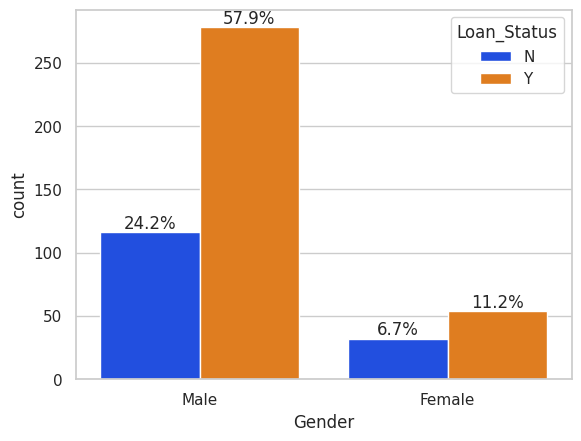

In [31]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Gender" categories based on "Loan_Status"
ax = sns.countplot(x="Gender", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Gender" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()

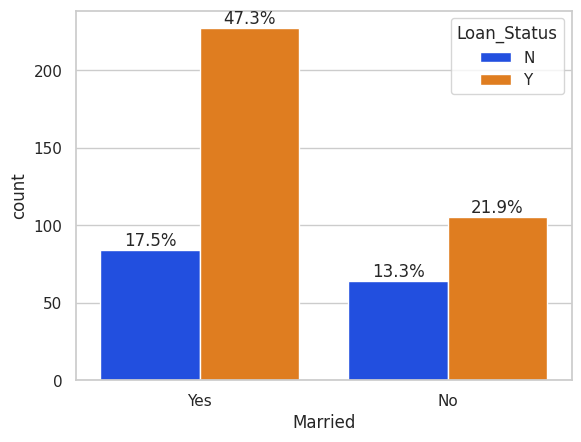

In [32]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Married" categories based on "Loan_Status"
ax = sns.countplot(x="Married", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Married" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()


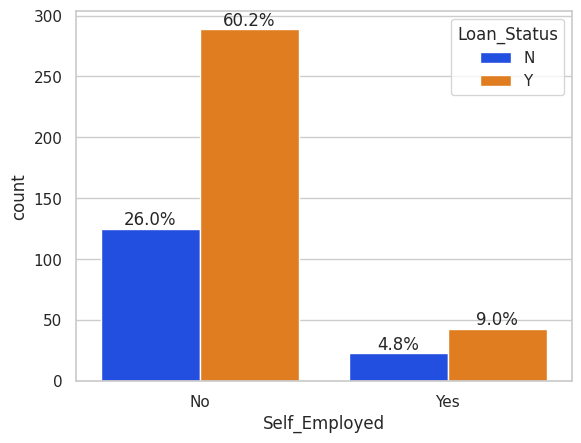

In [33]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Self_Employed" categories based on "Loan_Status"
ax = sns.countplot(x="Self_Employed", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Self_Employed" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()


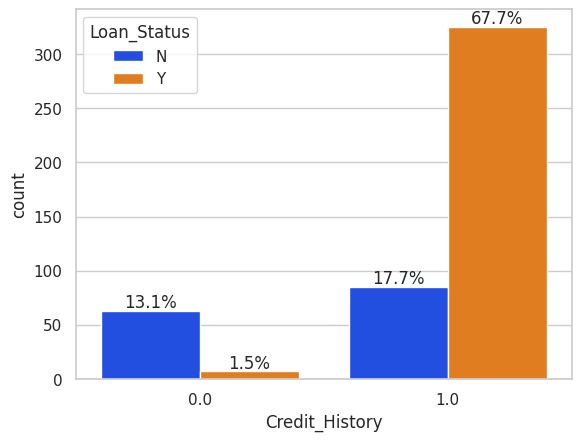

In [61]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Credit_History" categories based on "Loan_Status"
ax = sns.countplot(x="Credit_History", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Credit_History" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()


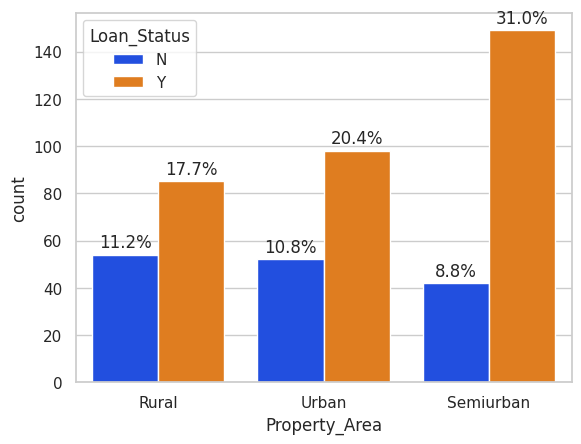

In [34]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Property_Area" categories based on "Loan_Status"
ax = sns.countplot(x="Property_Area", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Property_Area" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()

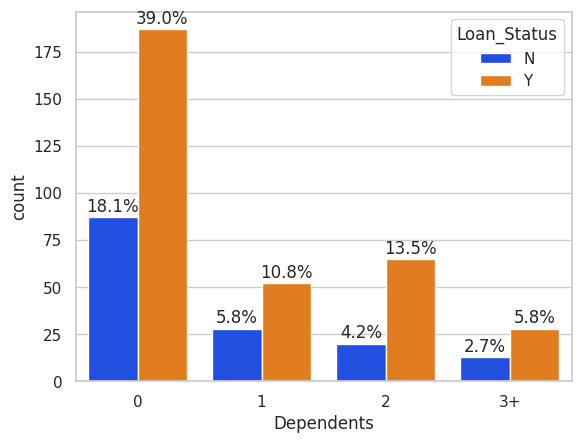

In [36]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# define the desired order of "Dependents" categories
dependents_order = ['0', '1', '2', '3+']
# create a count plot to show the distribution of "Dependents" categories based on "Loan_Status"
ax = sns.countplot(x="Dependents", hue="Loan_Status", data=clean_df,order=dependents_order)
# calculate percentage for each category of "Dependents" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()

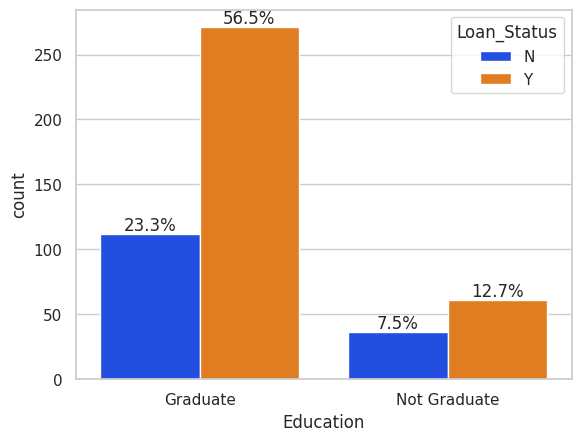

In [64]:
# set the style of the Seaborn plots
sns.set(style="whitegrid", palette ='bright')
# create a count plot to show the distribution of "Education" categories based on "Loan_Status"
ax = sns.countplot(x="Education", hue="Loan_Status", data=clean_df)
# calculate percentage for each category of "Education" and "Loan_Status"
# get the total number of rows
total_counts = len(clean_df)
# iterate through each bar (patch)
for p in ax.patches:
  # get the height (count) of each bar
    height = p.get_height()
    # calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_counts:.1%}', ha="center")
#display
plt.show()


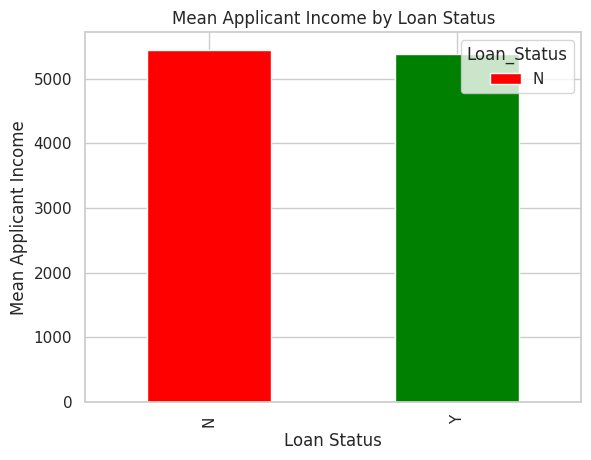

In [61]:
# calculate the mean
mean_applicant_income_by_loan_status = df.groupby('Loan_Status')['ApplicantIncome'].mean()
# plot the bar chart for the means of "ApplicantIncome" for each category of "Loan_Status"
ax = mean_applicant_income_by_loan_status.plot.bar(color=['red','green' ])
# set labels for x and y axis and the title
plt.xlabel('Loan Status')
plt.ylabel('Mean Applicant Income')
plt.title('Mean Applicant Income by Loan Status')
# add a legend for the 'Loan_Status' categories with explicit labels
plt.legend(labels=['N', 'Y'], title='Loan_Status', loc='upper right')
# display the plot
plt.show()

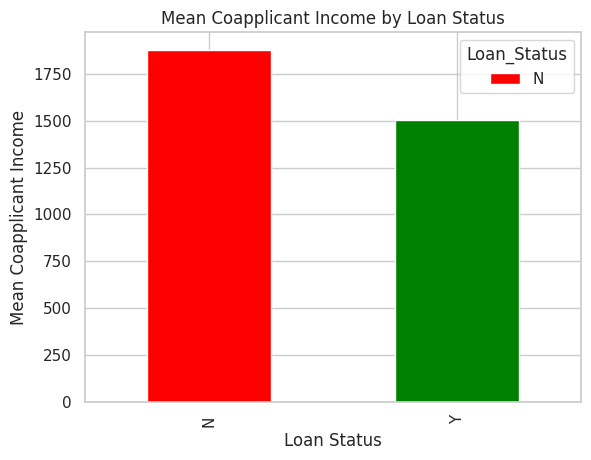

In [65]:
# calculate the mean
mean_coapplicant_income_by_loan_status = df.groupby('Loan_Status')['CoapplicantIncome'].mean()
# plot the bar chart for the means of "CoapplicantIncome" for each category of "Loan_Status"
ax = mean_coapplicant_income_by_loan_status.plot.bar(color=[ 'red' ,'green',])
# set labels for x, y axis and the title
plt.xlabel('Loan Status')
plt.ylabel('Mean Coapplicant Income')
plt.title('Mean Coapplicant Income by Loan Status')
# add a legend
plt.legend(labels=['N', 'Y'], title='Loan_Status', loc='upper right')
# display the plot
plt.show()
